In [102]:
from datascience import *
import pandas as pd 
import math
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix 
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn import neighbors
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plots
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
data = pd.read_csv("SIREN_data_cleaned.csv")
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 7, col:col + 7]
    interact(peek, row=(0, len(df), 7), col=(0, len(df.columns) - 7))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))
labels = data.columns.values

In [3]:
df_interact(data)

interactive(children=(IntSlider(value=0, description='row', max=2842, step=7), IntSlider(value=0, description=…

(2842 rows, 18 columns) total


In [4]:
lst = []
for i in range(len(labels)):
    y = np.asarray(data[labels[i]])
    lst.append(y)
lst = np.array(lst)
lst

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [71., 71., 40., ..., 53., 42., 85.],
       [ 1.,  1.,  1., ...,  1.,  2.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
corr_matrix = np.corrcoef(lst).round(decimals=2)
corr_matrix = pd.DataFrame(data=corr_matrix,index=labels,columns=labels)


(18.0, 0.0)

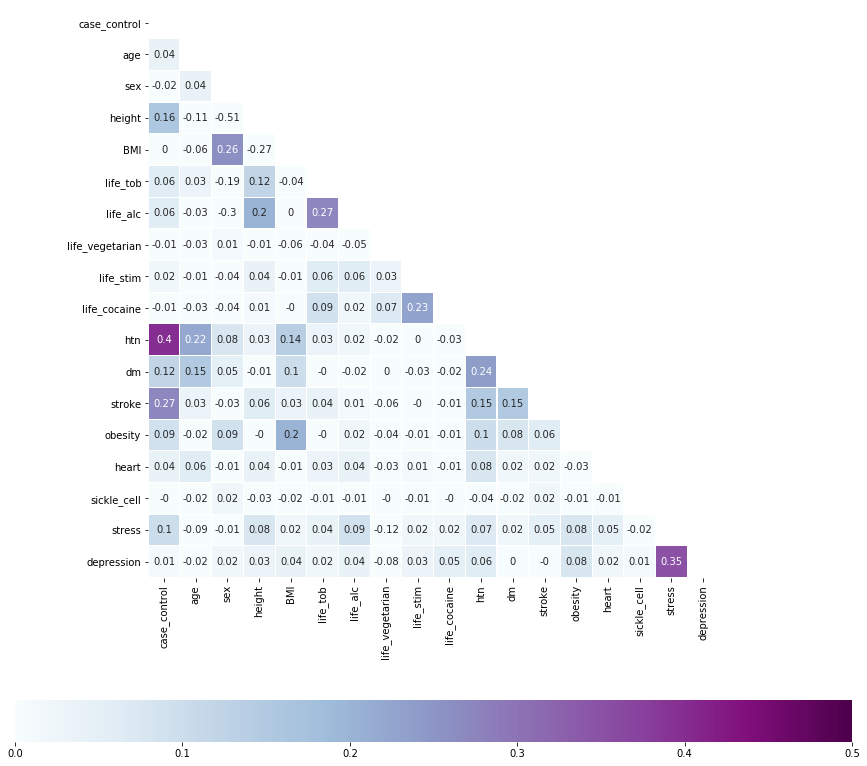

In [6]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plots.subplots(figsize=(15,15)) 
sns.heatmap(corr_matrix, cmap="BuPu", cbar_kws={"orientation": "horizontal"}, mask = mask, vmin = 0, vmax = 0.5, annot = True, linewidths = 0.05, square = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [7]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)


def bootstrap_correlation(df,x, y, repetitions):
    # the number of observations
    n=df.shape[0]
    # Bootstrap the scatter, find the slope, collect
    corr = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = df.sample(n,replace=True)
        bootstrap_corr = correlation(bootstrap_sample[x], bootstrap_sample[y])
        corr = np.append(corr, bootstrap_corr)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, corr)
    right = percentile(97.5, corr)
    
    # Slope of the regression line from the original sample
    observed_corr = correlation(df[x],df[y])
    
    # Display results
    print('Correlation between x and y:', observed_corr)
    print('Approximate 95%-confidence interval for the true correlation:')
    print(left, 'to', right)
 

In [8]:
df_htn = data[["case_control","htn"]]
bootstrap_correlation(df_htn, "case_control","htn", 1000)

Correlation between x and y: 0.3960823826046436
Approximate 95%-confidence interval for the true correlation:
0.3613122782661541 to 0.4279563161451185


In [9]:
df_height = data[["case_control","height"]]
bootstrap_correlation(df_height, "case_control","height", 1000)

Correlation between x and y: 0.16340264898792484
Approximate 95%-confidence interval for the true correlation:
0.1313121720584897 to 0.19794934294416225


In [10]:
df_dm = data[["case_control","dm"]]
bootstrap_correlation(df_dm, "case_control","dm", 1000)

Correlation between x and y: 0.1206162409367179
Approximate 95%-confidence interval for the true correlation:
0.08448800880369818 to 0.1585260051702554


In [11]:
df_stroke = data[["case_control","stroke"]]
bootstrap_correlation(df_stroke, "case_control","stroke", 1000)

Correlation between x and y: 0.26968659297088476
Approximate 95%-confidence interval for the true correlation:
0.2437041787120698 to 0.29217073485545964


In [12]:
df_stress = data[["case_control","stress"]]
bootstrap_correlation(df_stress, "case_control","stress", 1000)

Correlation between x and y: 0.10023696172058409
Approximate 95%-confidence interval for the true correlation:
0.06364435780918602 to 0.14105572608161593


In [112]:
x = data[["height", "htn", "dm", "stroke", "stress"]]
y = data[["case_control"]]

In [16]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.46, random_state=0)

In [20]:
logisticRegr = lr()
logisticRegr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predictions = logisticRegr.predict(x_test)

In [22]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7224770642201835


In [25]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[578 213]
 [150 367]]


In [26]:
y_test_a = y_test.to_numpy()
y_test_a

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [27]:
predictions

array([0, 0, 1, ..., 0, 1, 0])

In [28]:
ns_probs = [0 for _ in range(len(y_test))]
ns_probs

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [29]:
lr_probs = logisticRegr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_probs

array([0.201255  , 0.19108233, 0.55075832, ..., 0.23356425, 0.61160262,
       0.19372069])

In [30]:
ns_auc = sk.metrics.roc_auc_score(y_test_a, ns_probs)
lr_auc = sk.metrics.roc_auc_score(y_test_a, lr_probs)

In [31]:
ns_fpr, ns_tpr, _ = sk.metrics.roc_curve(y_test_a, ns_probs)
lr_fpr, lr_tpr, _ = sk.metrics.roc_curve(y_test_a, lr_probs)

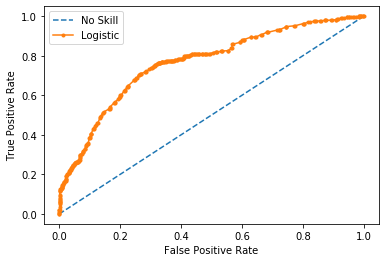

In [32]:
plots.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plots.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plots.xlabel('False Positive Rate')
plots.ylabel('True Positive Rate')
# show the legend
plots.legend()
# show the plot
plots.savefig("mygraph.png")


In [ ]:
#Logistic regression
lst = []

for i in range(99):
    x_train, x_test, y_train, y_test = tts(x, y, test_size=(i+1)/100, random_state=0)
    logisticRegr = lr()
    logisticRegr.fit(x_train, y_train)
    z = logisticRegr.score(x_test, y_test)
    lst.append([(i+1)/100, z])

lst

In [107]:
#KNN
lst = []

for j in range (150):
    n_neighbors = j+1
    min_test = 100*n_neighbors/2842
    r = 100 - min_test
    for i in range(math.ceil(min_test), math.floor(r)):
        ts = i/100
        x_train, x_test, y_train, y_test = tts(x, y, test_size=ts, random_state=0)
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
        clf.fit(x_train, y_train)
        z = clf.score(x_test, y_test)
        lst.append([n_neighbors,ts, z])

lst



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/opt

[[1, 0.01, 0.6896551724137931],
 [1, 0.02, 0.6842105263157895],
 [1, 0.03, 0.627906976744186],
 [1, 0.04, 0.6666666666666666],
 [1, 0.05, 0.6643356643356644],
 [1, 0.06, 0.6842105263157895],
 [1, 0.07, 0.6633165829145728],
 [1, 0.08, 0.6403508771929824],
 [1, 0.09, 0.64453125],
 [1, 0.1, 0.631578947368421],
 [1, 0.11, 0.6645367412140575],
 [1, 0.12, 0.6228070175438597],
 [1, 0.13, 0.6594594594594595],
 [1, 0.14, 0.5979899497487438],
 [1, 0.15, 0.6510538641686182],
 [1, 0.16, 0.654945054945055],
 [1, 0.17, 0.6301652892561983],
 [1, 0.18, 0.673828125],
 [1, 0.19, 0.6111111111111112],
 [1, 0.2, 0.6414762741652021],
 [1, 0.21, 0.6365159128978225],
 [1, 0.22, 0.6501597444089456],
 [1, 0.23, 0.636085626911315],
 [1, 0.24, 0.6530014641288433],
 [1, 0.25, 0.6315049226441631],
 [1, 0.26, 0.625169147496617],
 [1, 0.27, 0.6458333333333334],
 [1, 0.28, 0.621859296482412],
 [1, 0.29, 0.6424242424242425],
 [1, 0.3, 0.6060961313012896],
 [1, 0.31, 0.6031746031746031],
 [1, 0.32, 0.6329670329670329],


In [108]:
#Determining best configuration
max_accuracy = 0
best = None

for x in lst:
    if x[2] >= max_accuracy:
        max_accuracy = x[2]
        best = x

print (max_accuracy, best)
        

0.7692307692307693 [11, 0.05, 0.7692307692307693]


In [85]:
#SVM
lst = []

for i in range(99):
    x_train, x_test, y_train, y_test = tts(x, y, test_size=(i+1)/100, random_state=0)
    sv = svm.SVC()
    sv.fit(x_train, y_train)
    z = sv.score(x_test, y_test)
    lst.append([(i+1)/100, z])

lst

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

[[0.01, 0.7931034482758621],
 [0.02, 0.7719298245614035],
 [0.03, 0.7790697674418605],
 [0.04, 0.7280701754385965],
 [0.05, 0.7412587412587412],
 [0.06, 0.7251461988304093],
 [0.07, 0.7286432160804021],
 [0.08, 0.7192982456140351],
 [0.09, 0.72265625],
 [0.1, 0.7157894736842105],
 [0.11, 0.7156549520766773],
 [0.12, 0.7192982456140351],
 [0.13, 0.7297297297297297],
 [0.14, 0.7361809045226131],
 [0.15, 0.7400468384074942],
 [0.16, 0.7450549450549451],
 [0.17, 0.7479338842975206],
 [0.18, 0.748046875],
 [0.19, 0.7444444444444445],
 [0.2, 0.7223198594024605],
 [0.21, 0.7202680067001676],
 [0.22, 0.7156549520766773],
 [0.23, 0.7064220183486238],
 [0.24, 0.7071742313323572],
 [0.25, 0.7088607594936709],
 [0.26, 0.706359945872801],
 [0.27, 0.7057291666666666],
 [0.28, 0.7035175879396985],
 [0.29, 0.7078787878787879],
 [0.3, 0.7092614302461899],
 [0.31, 0.7029478458049887],
 [0.32, 0.7065934065934066],
 [0.33, 0.7078891257995735],
 [0.34, 0.7011375387797312],
 [0.35, 0.6974874371859296],
 [0.

In [94]:
#Decision tree
lst = []

for i in range(99):
    x_train, x_test, y_train, y_test = tts(x, y, test_size=(i+1)/100, random_state=0)
    tr = tree.DecisionTreeClassifier()
    tr = tr.fit(x_train, y_train)
    z = tr.score(x_test, y_test)
    lst.append([(i+1)/100, z])

lst

[[0.01, 0.6896551724137931],
 [0.02, 0.7192982456140351],
 [0.03, 0.7209302325581395],
 [0.04, 0.7280701754385965],
 [0.05, 0.7412587412587412],
 [0.06, 0.7368421052631579],
 [0.07, 0.7437185929648241],
 [0.08, 0.7324561403508771],
 [0.09, 0.73828125],
 [0.1, 0.7263157894736842],
 [0.11, 0.7220447284345048],
 [0.12, 0.7309941520467836],
 [0.13, 0.7351351351351352],
 [0.14, 0.7336683417085427],
 [0.15, 0.7353629976580797],
 [0.16, 0.734065934065934],
 [0.17, 0.731404958677686],
 [0.18, 0.72265625],
 [0.19, 0.7185185185185186],
 [0.2, 0.7152899824253075],
 [0.21, 0.7102177554438861],
 [0.22, 0.7092651757188498],
 [0.23, 0.6972477064220184],
 [0.24, 0.698389458272328],
 [0.25, 0.7032348804500703],
 [0.26, 0.7009472259810555],
 [0.27, 0.6888020833333334],
 [0.28, 0.6834170854271356],
 [0.29, 0.6896969696969697],
 [0.3, 0.6928487690504103],
 [0.31, 0.6893424036281179],
 [0.32, 0.6901098901098901],
 [0.33, 0.6918976545842217],
 [0.34, 0.6845915201654602],
 [0.35, 0.6864321608040201],
 [0.36,

In [113]:
#Forests of randomized trees
lst = []

for i in range(99):
    x_train, x_test, y_train, y_test = tts(x, y, test_size=(i+1)/100, random_state=0)
    rfc = RandomForestClassifier(n_estimators=100)
    rfc = rfc.fit(x_train, y_train)
    z = rfc.score(x_test, y_test)
    lst.append([(i+1)/100, z])

lst

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_lau

[[0.01, 0.6896551724137931],
 [0.02, 0.7192982456140351],
 [0.03, 0.7325581395348837],
 [0.04, 0.6929824561403509],
 [0.05, 0.7342657342657343],
 [0.06, 0.7251461988304093],
 [0.07, 0.7386934673366834],
 [0.08, 0.7149122807017544],
 [0.09, 0.71875],
 [0.1, 0.7192982456140351],
 [0.11, 0.7156549520766773],
 [0.12, 0.7309941520467836],
 [0.13, 0.7243243243243244],
 [0.14, 0.7311557788944724],
 [0.15, 0.7353629976580797],
 [0.16, 0.734065934065934],
 [0.17, 0.7293388429752066],
 [0.18, 0.716796875],
 [0.19, 0.7203703703703703],
 [0.2, 0.7205623901581723],
 [0.21, 0.7185929648241206],
 [0.22, 0.7220447284345048],
 [0.23, 0.6987767584097859],
 [0.24, 0.6925329428989752],
 [0.25, 0.6962025316455697],
 [0.26, 0.6968876860622463],
 [0.27, 0.7005208333333334],
 [0.28, 0.6834170854271356],
 [0.29, 0.6872727272727273],
 [0.3, 0.6881594372801876],
 [0.31, 0.6836734693877551],
 [0.32, 0.6879120879120879],
 [0.33, 0.6876332622601279],
 [0.34, 0.6814891416752844],
 [0.35, 0.6804020100502512],
 [0.36,

In [100]:
#Multi-layer Perceptron
lst = []

for i in range(99):
    x_train, x_test, y_train, y_test = tts(x, y, test_size=(i+1)/100, random_state=0)
    mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    mlpc = mlpc.fit(x_train, y_train)
    z = mlpc.score(x_test, y_test)
    lst.append([(i+1)/100, z])

lst

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was pass

[[0.01, 0.5517241379310345],
 [0.02, 0.6666666666666666],
 [0.03, 0.6627906976744186],
 [0.04, 0.6403508771929824],
 [0.05, 0.6363636363636364],
 [0.06, 0.6374269005847953],
 [0.07, 0.6482412060301508],
 [0.08, 0.6535087719298246],
 [0.09, 0.640625],
 [0.1, 0.6421052631578947],
 [0.11, 0.6261980830670927],
 [0.12, 0.6052631578947368],
 [0.13, 0.6135135135135135],
 [0.14, 0.6130653266331658],
 [0.15, 0.6088992974238876],
 [0.16, 0.6153846153846154],
 [0.17, 0.6260330578512396],
 [0.18, 0.619140625],
 [0.19, 0.6166666666666667],
 [0.2, 0.6133567662565905],
 [0.21, 0.6147403685092128],
 [0.22, 0.610223642172524],
 [0.23, 0.6070336391437309],
 [0.24, 0.6090775988286969],
 [0.25, 0.6104078762306611],
 [0.26, 0.6062246278755075],
 [0.27, 0.6067708333333334],
 [0.28, 0.6067839195979899],
 [0.29, 0.6096969696969697],
 [0.3, 0.6060961313012896],
 [0.31, 0.6009070294784581],
 [0.32, 0.6032967032967033],
 [0.33, 0.6066098081023454],
 [0.34, 0.6049638055842813],
 [0.35, 0.6050251256281407],
 [0.36